In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, inv
from scipy.linalg import solve_banded
from numpy.fft import rfft, irfft
import time

In [ ]:
def f(x):
    return 1 + (1/2)*np.tanh(2*x)
    

N = 100
x = np.linspace(-2, 2, N)
h = 1e-5

df_dx = (f(x + (h/2)) - f(x - h/2)) / h 

In [ ]:
analytical = 1 / np.cosh(2*x)**2

In [ ]:
plt.plot(x, df_dx, marker='.', label='numerical')
plt.plot(x, analytical, label='analytical')
plt.legend()

In [ ]:
print(analytical - df_dx)

In [ ]:
x

In [ ]:
def f1(x):
    return 1 + 1/(2*np.tanh(2*x))

def derive(f, x, h: int = 1e-5):
    return (f(x + (h/2)) - f(x - h/2)) / h 

df_dx1 = (f1(x + (h/2)) - f1(x - h/2)) / h 
# yarr = derive(f1, x)
analytical1 = -1 / (np.sinh(2*x)**2)

In [ ]:
plt.plot(x, df_dx1, marker='.', label='numerical')
# plt.plot(x, yarr, marker='.', label='numerical')
plt.plot(x, analytical1, label='tanh downstairs')
# plt.plot(x, analytical, label='tanh upstairs') 
# plt.ylim(-10000,10000)
# plt.xscale('log')
plt.legend()

In [ ]:
df_dx1

In [ ]:
yarr

# Interpolation

In [ ]:
x = [0,1,2,3,4]
f = [1.,2.,5.,10.,17.]

def interpolate(arr, f, x):
    idx = np.searchsorted(arr, x)
    print(idx)
    
    if idx == 0:
        return arr[0]
    elif idx == len(arr):
        return arr[-1]
    
    a, b = arr[idx - 1], arr[idx]
    print(a,b)
    
    y = f[a] + ((x - arr[a]) / (arr[b] - arr[a])) * (f[b] - f[a])
    
    return y

interpolated_value = interpolate(x, f, 1.3)
print(f"Interpolated value: {interpolated_value}")


# Gaussian Elimination with Backsub

In [ ]:
A = np.array([[2.,1,4,1],
             [3,4,-1,-1],
             [1,-4,1,5],
             [2,-2,1,3]])
v = np.array([-4.,3,9,7])


In [ ]:
# Volts problem
vA = np.array([[4.,-1,-1,-1],
               [-1,3,0,-1],
               [-1,0,3,-1],
               [-1,-1,-1,4]])
vv = np.array([5,0,5,0])

In [ ]:
################
# for-loops
################

# Gaussian elim
def gausselim(A,v):
    N = len(v)
    for m in range(N):
        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x
        
print(gausselim(vA,vv))

### Partial Pivoting

In [ ]:
A1 = np.array([[0,1.,4,1],
               [3,4,-1,-1],
               [1,-4,1,5],
               [2,-2,1,3]])

v1 = np.array([-4.,3,9,7])

In [ ]:
def part_pivot(A,v):
    N = len(v)
    for m in range(N):
        
        # check the row and swap if mth row 
        # does not have max value at mth element
        idx = np.argmax(np.abs(A[m:,m])) + m
        if idx != m:
            A[[m, idx], :] = A[[idx, m], :]
            v[[m, idx]] = v[[idx, m]]

        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x

In [ ]:
part_pivot(A,v)

In [ ]:
part_pivot(A1,v1)

In [ ]:
x = solve(A,v)
x

In [ ]:
X = inv(A)
X

### tridiagonal matrices

In [ ]:
# constants
N = 26
C = 1.
m = 1.
k = 6.
omega = 2.
alpha = 2*k-(m*omega**2)

# set up init values of arrays
A = np.zeros([N,N])
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
v = np.zeros(N)
v[0]=C

# print("A before Gaussian elim")
# print(A)

# Gussian elim
for i in range(N-1):

    # divide row i by its diagonal elem
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    # print(f"i: {i}")
    # print(f"A after division at i={i}")
    # print(A)

    # sub from next row down
    A[i+1,i+1] -= A[i+1, i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
    # print(f"A after subtracting next row at i={i}")
    # print(A)

# divide last elem of v by last diag elem
v[N-1] /= A[N-1, N-1]
# print("A after dividing last elem of v by last diag elem")
# print(v)

# backsub
x = np.zeros(N)
x[N-1] = v[N-1]
for i in range(N-2, -1, -1):
    x[i] = v[i] - A[i, i+1]*x[i+1]
    # print(x[i])

# plot
plt.plot(x)
plt.plot(x, "ko")
plt.show()

In [ ]:
A1 = np.zeros([3,N])
A1[0,:] = -k
A1[1,:] = alpha
A1[2,:] = -k
A1[1,0] = alpha - k
A1[1,N-1] = alpha - k

x1 = solve_banded((1,1),A1,v)
plt.plot(x1)
plt.plot(x1, 'ko')
plt.show()

## Nonlinear Equations

### relaxation method

In [ ]:
from math import exp

In [ ]:
c = np.arange(0,3.1,0.1)
x = 1

def fn(c):
    return 1 - np.exp(-c*x)

def relax(func, c, guess):
    for k in range(100):
        guess = func(c)
    return guess

solns = relax(fn, c, x) 

In [ ]:
for k in range(100):
    x = fn(c)

In [ ]:
plt.plot(c, solns, label=f'f(x)={solns[-1]:.3f}')
plt.xlabel('C')
plt.ylabel('x')
plt.legend()
plt.show()

In [ ]:
np.shape(solns)

## Newton-Raphson

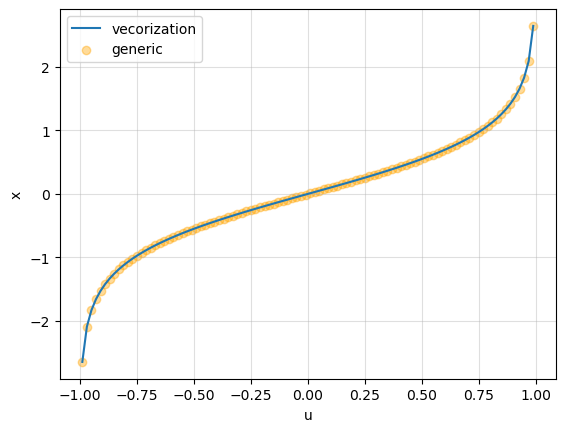

In [42]:
# example 6.4: inverse hyperbolic tangent

eps = 1e-12

def arctanh(u):
    x = 0.
    delta = 1.
    while np.abs(delta) > eps:
        delta = (np.tanh(x) - u)*np.cosh(x)**2
        x -= delta
    return x

# python/vectorization solution
arctanh_vec = np.vectorize(arctanh)
u_vals_vec = np.linspace(-0.99, 0.99, 100)
x_points_vec = arctanh_vec(u_vals)

# generic solution
u_vals_gen = np.linspace(-0.99, 0.99, 100)
x_points_gen = []
for u in u_vals:
    x_points_gen.append(arctanh(u))

plt.plot(u_vals_vec, x_points_vec, label='vecorization')
plt.scatter(u_vals_gen, x_points_gen, color='orange', alpha=0.4, label='generic')
plt.xlabel('u')
plt.ylabel('x')
plt.grid(alpha=0.4)
plt.legend()
plt.show()



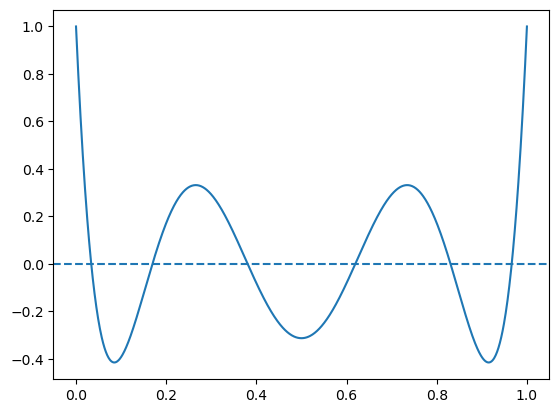

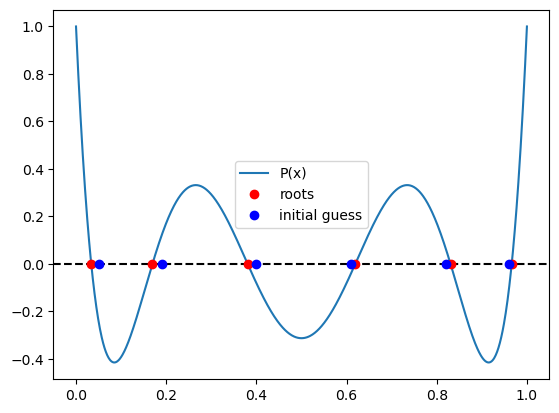

Root 1: 0.0337652429
Root 2: 0.1693953068
Root 3: 0.3806904070
Root 4: 0.6193095930
Root 5: 0.8306046932
Root 6: 0.9662347571


In [117]:
# Exercise 6.15: The roots of a polynomial

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, linestyle='--')
plt.show()

def Pp(x):
    return (6*924)*x**5 - (5*2772)*x**4 + (4*3150)*x**3 - (3*1680)*x**2 +(2*420)*x - 42

# Newton-Raphson method to find roots
def find_roots(guess_arr, eps=1e-10):
    roots = []
    for guess in guess_arr:
        delta = 1.
        iters = 0
        while np.abs(delta) > eps and iters < 1000:
            delta = P(guess) / Pp(guess)
            guess -= delta
            iters += 1
        if iters >= 1000:
            print("Reached max iterations for guess:", guess)
        roots.append(guess)
    return roots

root_guesses = np.array([0.05, 0.19, 0.4, 0.61, 0.82, 0.96])

# Find the roots using the Newton-Raphson method
roots = find_roots(root_guesses)

# Plot the polynomial and the found roots
x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals, label="P(x)")
plt.axhline(0, color='black', linestyle='--')

# Mark the roots on the plot
for i, root in enumerate(roots):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0

for i, guess in enumerate(root_guesses):
    if i == 0:
        plt.plot(guess, 0, 'bo', label='initial guess')
    else:
        plt.plot(guess, 0, 'bo')

plt.legend(loc='center')
plt.show()

# Print the roots to 10 decimal places
for i, root in enumerate(roots):
    print(f"Root {i+1}: {root:.10f}")

### Secant method

In [7]:
# Exercise 6.16: The Lagrange Point

# constants
G = 6.674e-8     
M = 5.972e27         # mass Earth
m = 7.348e25         # mass moon
R = 3.844e10          # dist from Earth to moon
omega = 2.662e-6     # angular velo

# strting guess is 2/3 R
r1_guess = (2/3)*R
r2_guess = r1_guess + 1e5

######################
# SECANT METHOD
######################

def forces(r):
    return ( (G*M) / r**2 ) - ( (G*m) / (R - r)**2 ) - (omega**2*r)

def find_L1(x1, x2, eps: float=1e-4):
    delta = 1e4
    iters = 1
    while np.abs(delta) > eps and iters < 1000:
        delta = forces(x2) * ((x2 - x1) / (forces(x2) - forces(x1)))
        x1, x2 = x2, x2 - delta
        iters += 1
        if iters > 1000:
            print('Reached max iters')
    return x2

L1 = find_L1(r1_guess, r2_guess)
print(f'L1 is a distance {L1:.4e} cm from Earth.')

L1 is a distance 3.2603e+10 cm from Earth.


## Golden Ratio Search

The min falls at 1.630516067174875 nm


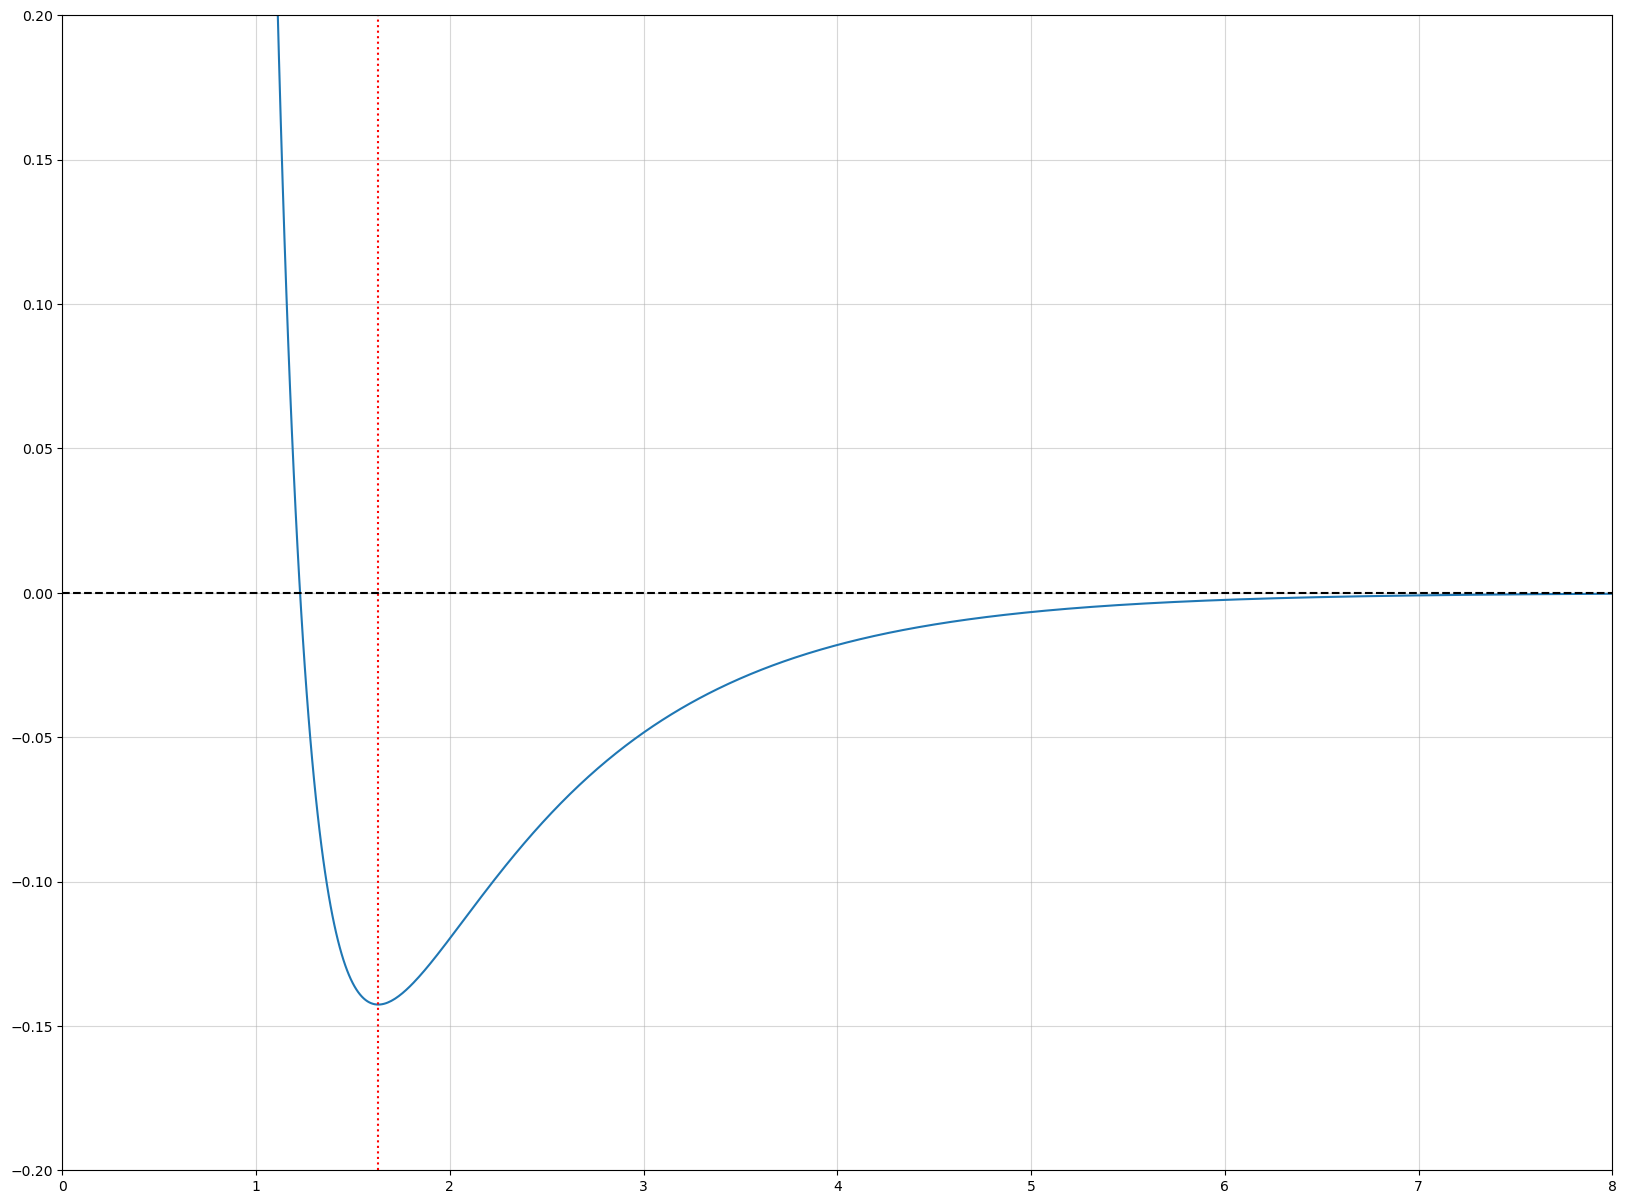

In [66]:
sigma = 1.
eps = 1e-6
z = (1+np.sqrt(5))/2

# function to calc Buckingham potential
def f(r):
    return (sigma/r)**6 - np.exp(-r/sigma)

# init posits of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4 - x1)/z
x3 = x1 + (x4 - x1)/z

# init values of function at points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# store the 'mins' found along the way
mins = []
# main
while x4 - x1 > eps:
    if f2 < f3:
        x4, f4 = x3, f3
        x3, f3 = x2, f2
        x2 = x4 - (x4 - x1)/z
        f2 = f(x2)
    else:
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        x3 = x1 + (x4 - x1)/z
        f3 = f(x3)
    mins.append(0.5*(x1+x4))

final_min = mins[-1]
print(f"The min falls at {final_min} nm")

###############################
# make a plot of the potential
################################
# Create a colormap from yellow to red
cmap = plt.colormaps['viridis']
colors = cmap(np.linspace(0,1, len(mins)))

r_vals = np.linspace(0.5, sigma*10, 1000)
fig = plt.figure(figsize=(20,15))
plt.plot(r_vals/sigma, f(r_vals))
plt.axvline(final_min, ls='dotted', color='red')
# for i, color in enumerate(colors):
#     plt.axvline(mins[i]/sigma, ls='--', color=color)
plt.ylim(-0.2, 0.2)  # Set y-limit to match the reference plot
plt.xlim(0, 8)       # Set x-limit to match the reference plot
plt.grid(True, alpha=0.5)
plt.axhline(0, ls='--', color='black')
plt.show()

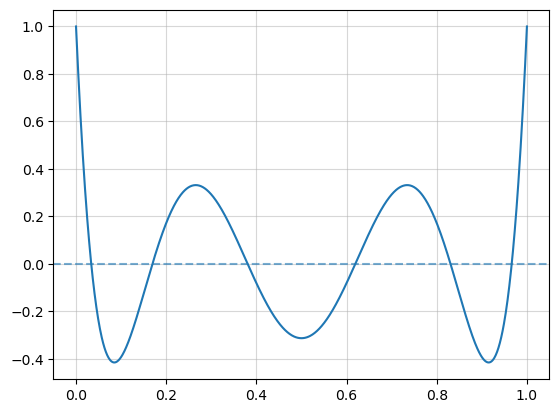

In [21]:
### Newton's method

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def PP(x):
    return (6*924)*x**5 - (5*2772)*x**4 + (4*3150)*x**3 - (3*1680)*x**2 +(2*420)*x - 42

x = np.linspace(0, 1, 1000)
plt.plot(x, P(x))
plt.axhline(0, ls='--', alpha=0.6)
plt.grid(alpha=0.5)
plt.show()

In [59]:
# Newton-Raphson method to find roots
def find_roots(guess_arr, f=P, fp=PP, eps=1e-10):
    roots = []
    iters_arr = []
    for guess in guess_arr:
        delta = 1.
        iters = 0
        while np.abs(delta) > eps and iters < 1000:
            delta = P(guess) / PP(guess)
            guess -= delta
            iters += 1
        if iters >= 1000:
            print("Reached max iterations for guess:", guess)
        iters_arr.append(iters)
        roots.append(guess)
    return roots, iters_arr

def find_roots_secant(guess_arr, f=P, eps=1e-10):
    roots = []
    iters_arr = []
    for i, guess in enumerate(guess_arr):
        x1 = guess
        x2 = guess+2*eps
        delta = 1.
        iters = 0
        while np.abs(delta) > eps:
            delta = f(x2)*((x2 - x1) / f(x2) - f(x1))
            x1, x2 = x2, x2-delta
            iters += 1
            if iters >= 1000:
                print("Reached max iterations for guess:", guess)
                break
        iters_arr.append(iters)
        roots.append(x2)
    return roots, iters_arr

root_guesses = np.array([0.05, 0.19, 0.4, 0.61, 0.82, 0.96])

# Find the roots using the Newton-Raphson method
roots, num_iters = find_roots(root_guesses)
roots_sec, num_iters_sec = find_roots_secant(root_guesses)

# Plot the polynomial and the found roots
x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

Reached max iterations for guess: 0.19
Reached max iterations for guess: 0.4
Reached max iterations for guess: 0.61
Reached max iterations for guess: 0.82


/var/folders/mr/334gy9_d1v5d4n8spjcbw2m40000gn/T/ipykernel_2557/4277538936.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  delta = f(x2)*((x2 - x1) / f(x2) - f(x1))
/var/folders/mr/334gy9_d1v5d4n8spjcbw2m40000gn/T/ipykernel_2557/4277538936.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  delta = f(x2)*((x2 - x1) / f(x2) - f(x1))


In [ ]:
# Mark the roots on the plot
for i, root in enumerate(roots):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0

for i, root in enumerate(roots_sec):
    if i == 1:
        plt.plot(root, 0, 'ro', alpha=1, label='roots_sec')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0


for i, guess in enumerate(root_guesses):
    if i == 0:
        plt.plot(guess, 0, 'bo', label='initial guess')
    else:
        plt.plot(guess, 0, 'bo')
plt.plot(x_vals, y_vals, label="P(x)")
plt.grid()
plt.axhline(0, ls='--')
plt.legend(loc='center')
plt.show()

# Print the roots to 10 decimal places
for i, root in enumerate(roots):
    print(f"Root {i+1}: {root:.12f} found in {num_iters[i]} iterations.")

In [46]:
for guess in root_guesses:
    print(guess)

0.05
0.19
0.4
0.61
0.82
0.96


## Fourier Transforms

Function to evaluate equation (7.15)

$c_k = \sum_{n=0}^{N-1}y_n\exp(-i\frac{2\pi kn}{N})$

for N real samples $y_n$ for all $k$ in the range $0\leq k\leq N/2$

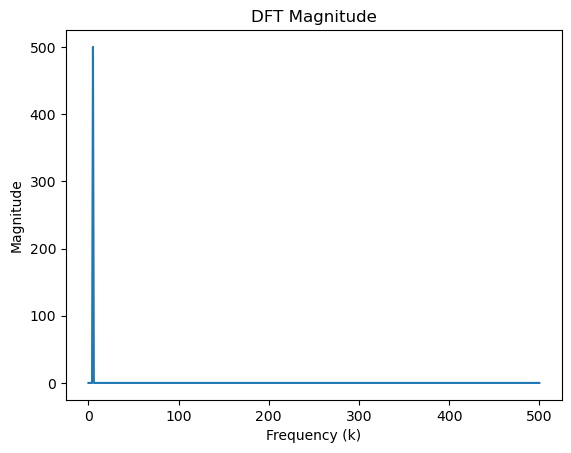

In [13]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1, dtype=complex)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

y = np.loadtxt('pitch.txt')
c = dft(y)
# Visualize the Fourier transform magnitude
plt.plot(np.abs(c))
plt.title('DFT Magnitude')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.show()

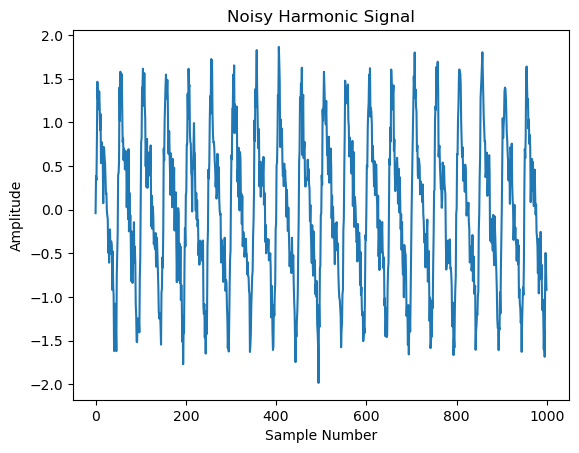

In [26]:
# Parameters for the signal
sampling_rate = 1000  # samples per second
duration = 1  # seconds
fundamental_frequency = 20  # Hz, fundamental frequency
harmonic2_frequency = 2 * fundamental_frequency  # 2nd harmonic
harmonic3_frequency = 3 * fundamental_frequency  # 3rd harmonic
amplitude = 1  # amplitude of the fundamental signal

# Generate time points
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the fundamental sine wave
signal_fundamental = amplitude * np.sin(2 * np.pi * fundamental_frequency * t)

# Generate the harmonics (2nd and 3rd harmonics)
signal_harmonic2 = (amplitude / 2) * np.sin(2 * np.pi * harmonic2_frequency * t)
signal_harmonic3 = (amplitude / 3) * np.sin(2 * np.pi * harmonic3_frequency * t)

# Combine the fundamental signal with its harmonics
combined_signal = signal_fundamental + signal_harmonic2 + signal_harmonic3

# Add some noise to the signal
noise = 0.2 * np.random.normal(size=combined_signal.shape)
noisy_signal = combined_signal + noise

# # Save the signal to a txt file
# file_path = '/Users/jaba_the_what/CUNY/CUNY_coursework/CM/code/noisy_pitch1.txt'
# np.savetxt(file_path, noisy_signal)

# Plot the signal
plt.plot(noisy_signal)
plt.title('Noisy Harmonic Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()


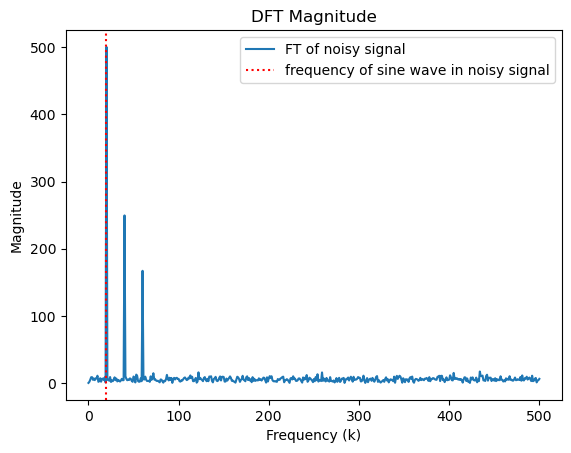

In [27]:
c = dft(noisy_signal)
# Visualize the Fourier transform magnitude
plt.plot(np.abs(c), label='FT of noisy signal')
plt.title('DFT Magnitude')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.axvline(fundamental_frequency, ls='dotted', c='r', label='frequency of sine wave in noisy signal')
plt.legend()
plt.show()

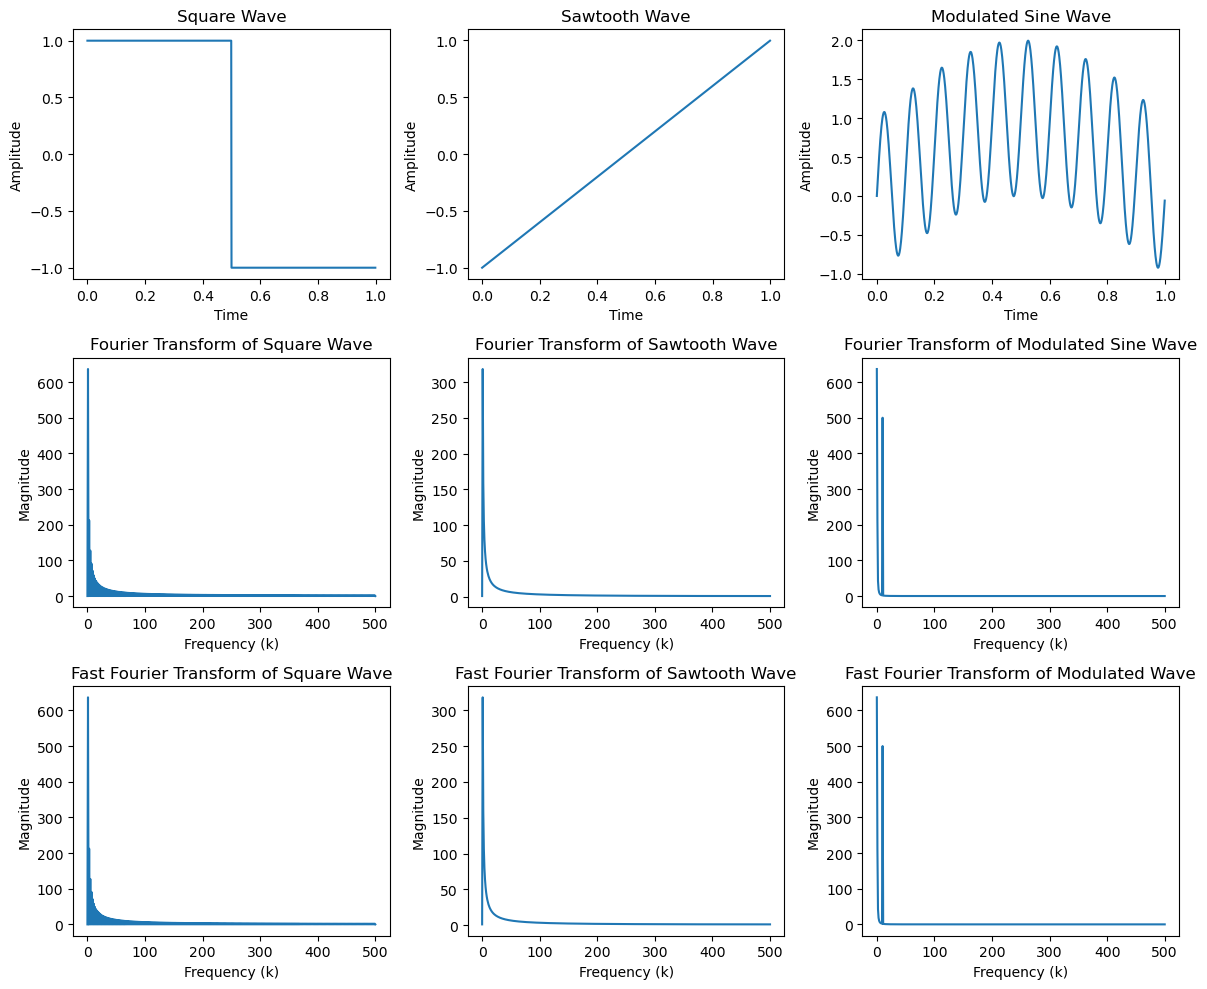

In [51]:
# exercise 7.1: FTs of simple functions
from scipy.signal import square, sawtooth

N = 1000   # number of sample points
t = np.linspace(0, 1, N, endpoint=False)  # time points

# part a: a single cycle of a square-wave with amplitude 
square_wave = square(2*np.pi*t)

# part b: sawtooth wave y_n = n
sawtooth_wave = sawtooth(2*np.pi*t)

# part c: modulated sine wave
modulated_wave = np.sin(np.pi*t) + np.sin(20*np.pi*t)


# plt.plot(t, sq)
# plt.show()
# plt.plot(t, st)
# plt.show()
# plt.show(t, yn)

# Compute the DFT of each signal
c_square = dft(square_wave)
c_sawtooth = dft(sawtooth_wave)
c_modulated = dft(modulated_wave)
c_square_fft = np.fft.rfft(square_wave)
c_sawtooth_fft = np.fft.rfft(sawtooth_wave)
c_modulated_fft = np.fft.rfft(modulated_wave)

# Create a 3x2 grid for plotting
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Row 1: Square wave and its FT
axs[0, 0].plot(t, square_wave)
axs[0, 0].set_title('Square Wave')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')

axs[1, 0].plot(np.abs(c_square))
axs[1, 0].set_title('Fourier Transform of Square Wave')
axs[1, 0].set_xlabel('Frequency (k)')
axs[1, 0].set_ylabel('Magnitude')

axs[2, 0].plot(np.abs(c_square_fft))
axs[2, 0].set_title('Fast Fourier Transform of Square Wave')
axs[2, 0].set_xlabel('Frequency (k)')
axs[2, 0].set_ylabel('Magnitude')

# Row 2: Sawtooth wave and its FT
axs[0, 1].plot(t, sawtooth_wave)
axs[0, 1].set_title('Sawtooth Wave')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(np.abs(c_sawtooth))
axs[1, 1].set_title('Fourier Transform of Sawtooth Wave')
axs[1, 1].set_xlabel('Frequency (k)')
axs[1, 1].set_ylabel('Magnitude')

axs[2, 1].plot(np.abs(c_sawtooth_fft))
axs[2, 1].set_title('Fast Fourier Transform of Sawtooth Wave')
axs[2, 1].set_xlabel('Frequency (k)')
axs[2, 1].set_ylabel('Magnitude')

# Row 3: Modulated sine wave and its FT
axs[0, 2].plot(t, modulated_wave)
axs[0, 2].set_title('Modulated Sine Wave')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(np.abs(c_modulated))
axs[1, 2].set_title('Fourier Transform of Modulated Sine Wave')
axs[1, 2].set_xlabel('Frequency (k)')
axs[1, 2].set_ylabel('Magnitude')

axs[2, 2].plot(np.abs(c_modulated_fft))
axs[2, 2].set_title('Fast Fourier Transform of Modulated Wave')
axs[2, 2].set_xlabel('Frequency (k)')
axs[2, 2].set_ylabel('Magnitude')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

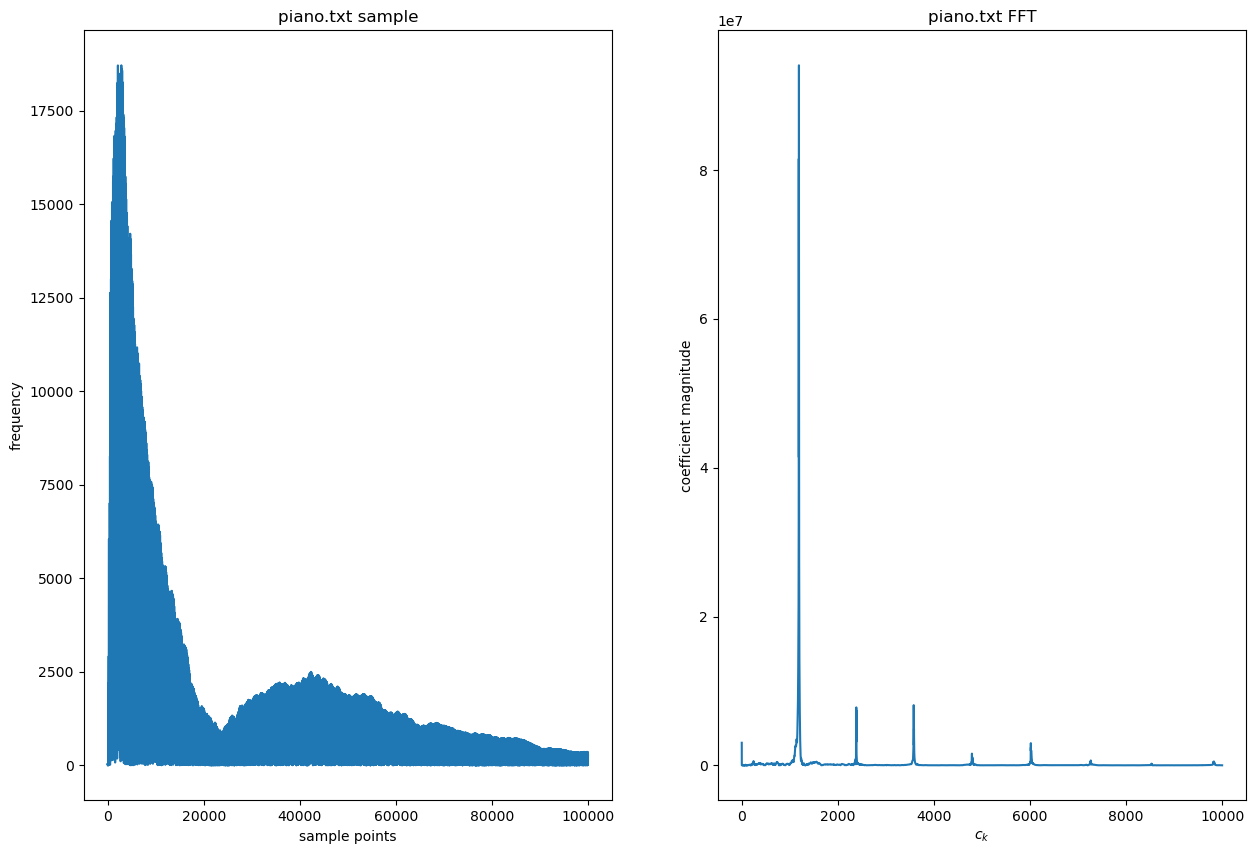

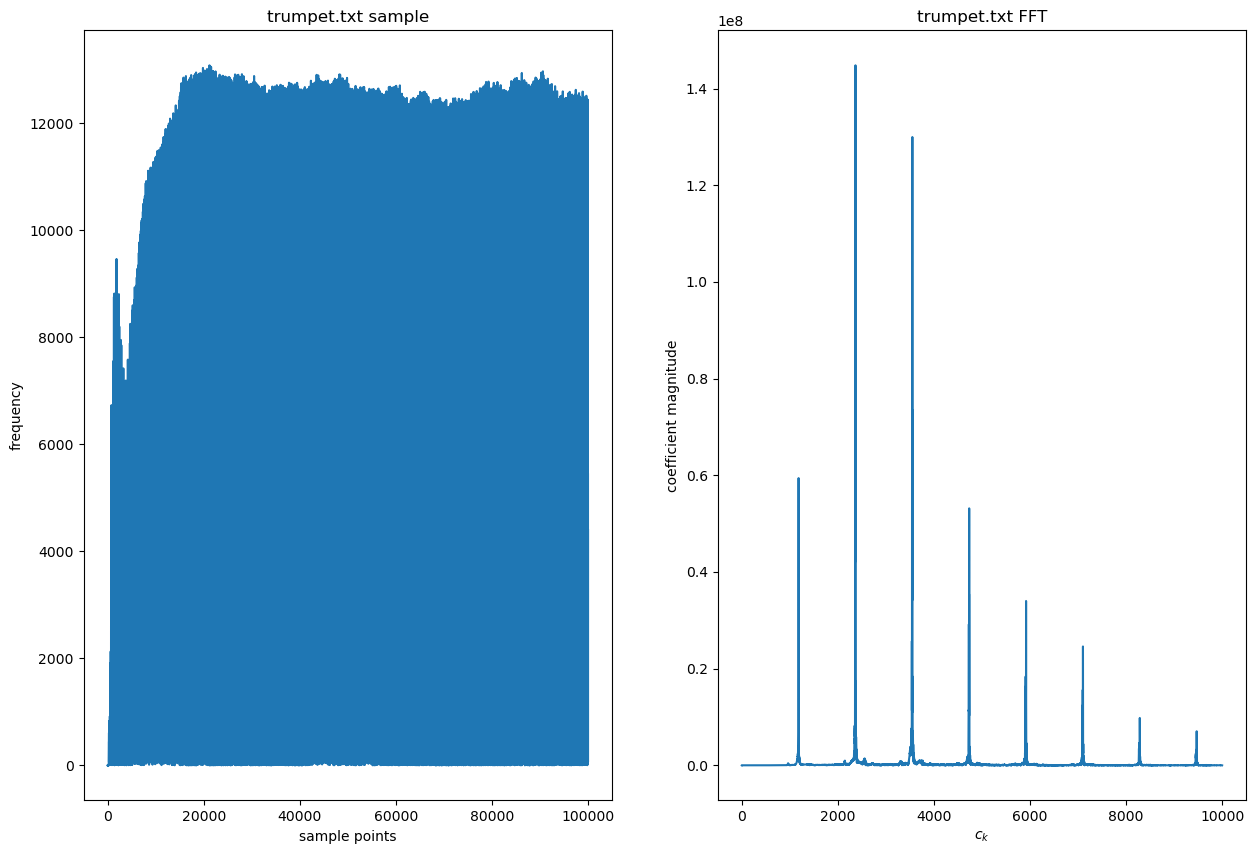

In [15]:
# exercise 7.3: Fourier transforms of musical instruments

def read_plot_transform(filename, num_coeffs: int=10000):
    y = np.loadtxt(filename)
    c = rfft(y)

    fig, axs = plt.subplots(1,2, figsize=(15,10))
    axs[0].plot(np.arange(len(y)), np.abs(y))
    axs[0].set_xlabel('sample points')
    axs[0].set_ylabel('frequency')
    axs[0].set_title(f'{filename} sample')
    axs[1].plot(np.arange(num_coeffs), np.abs(c[:num_coeffs]))
    axs[1].set_xlabel(r'$c_k$')
    axs[1].set_ylabel('coefficient magnitude')
    axs[1].set_title(f'{filename} FFT')
    plt.show()

read_plot_transform('piano.txt')
read_plot_transform('trumpet.txt')

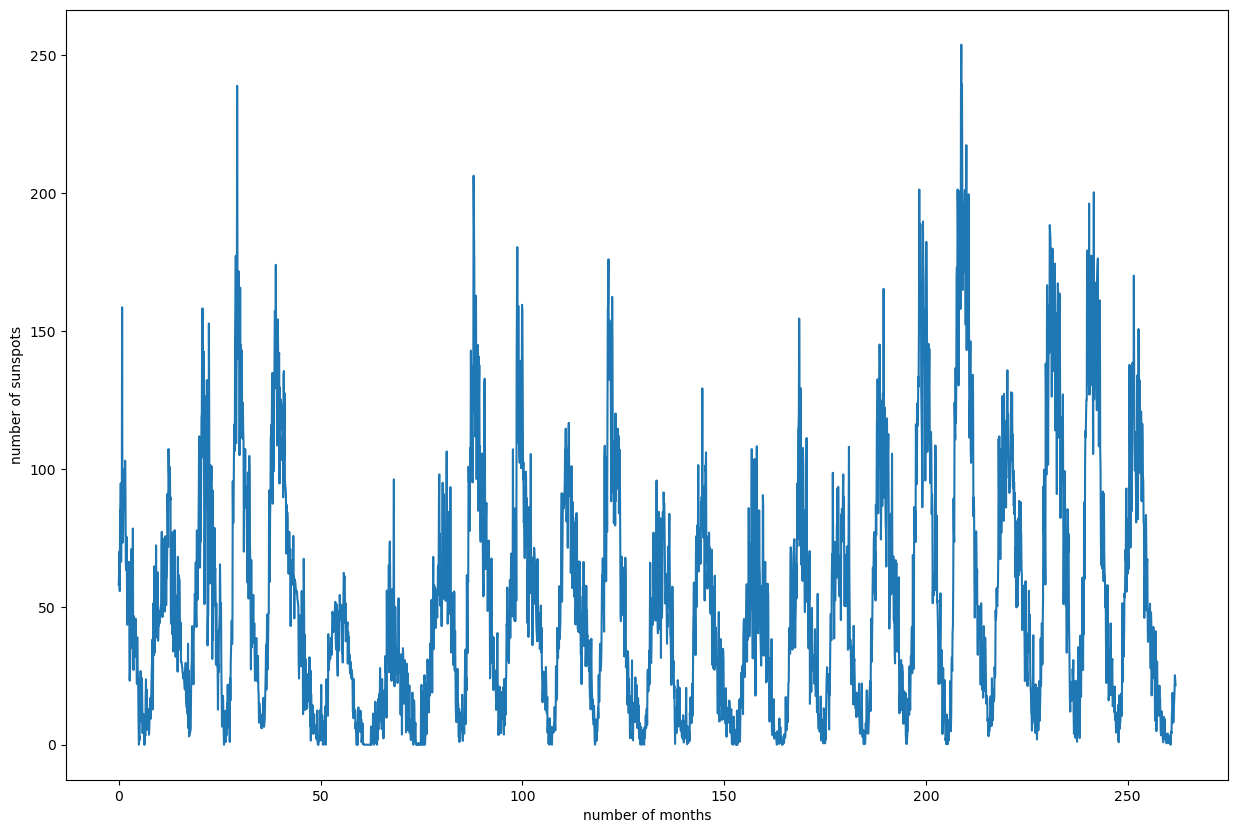

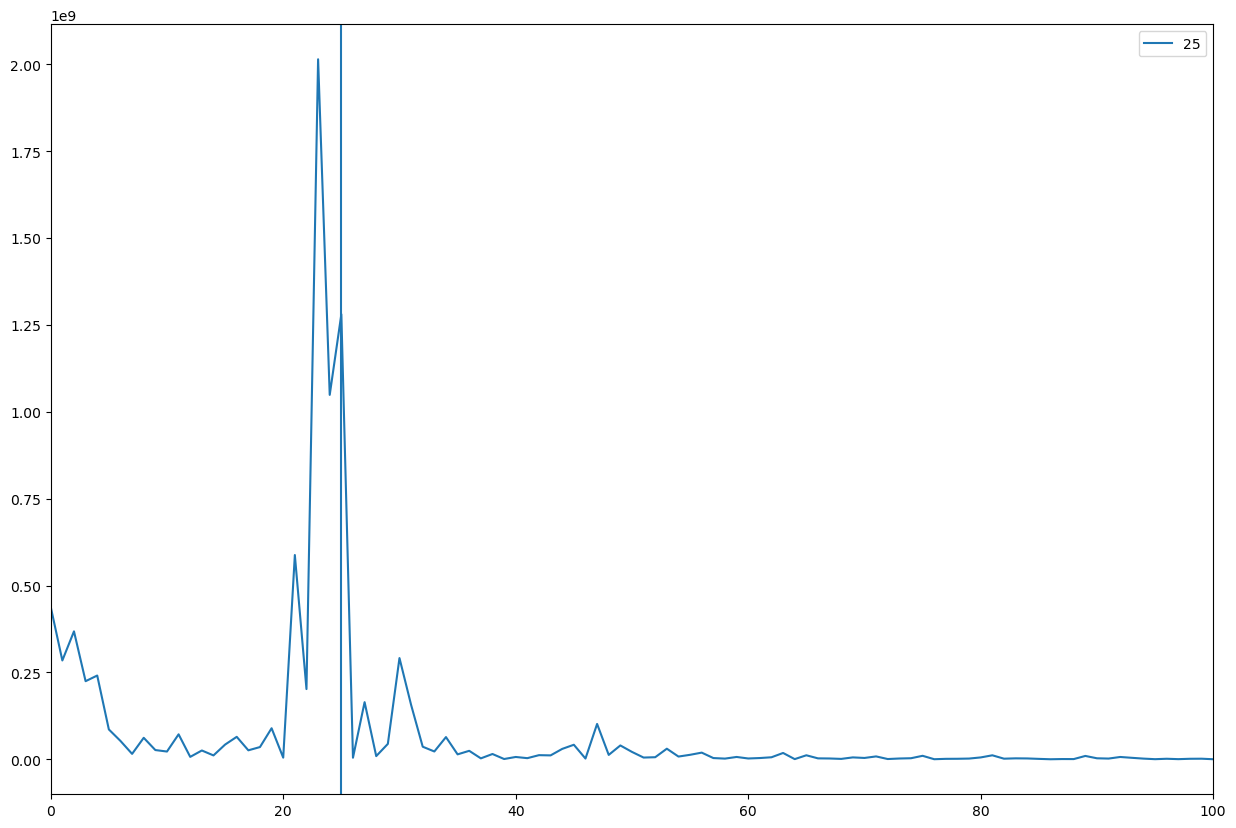

In [48]:
# in class exercise: sunspots
month, spots = np.loadtxt('sunspots.txt').T
c = dft(spots)
c = c[1:]

plt.figure(figsize=(15,10))
plt.plot(month/12, spots)
plt.xlabel('number of months')
plt.ylabel('number of sunspots')
plt.show()
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(c)), np.abs(c)**2)
plt.axvline(np.argmax(c), label=f'{np.argmax(c)}')
plt.legend()
plt.xlim(0,100)
plt.show()

In [41]:
test = np.array([1,2,3,4])
test[1:]

array([2, 3, 4])

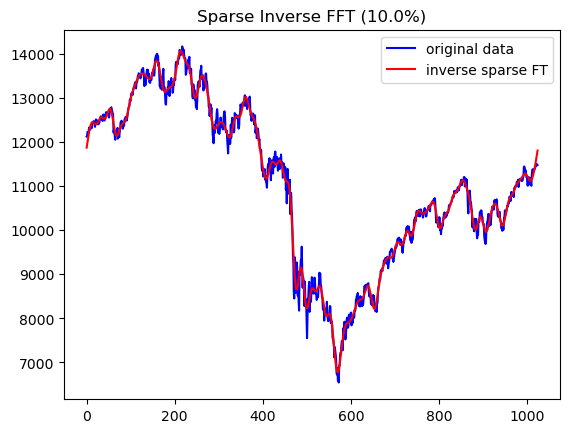

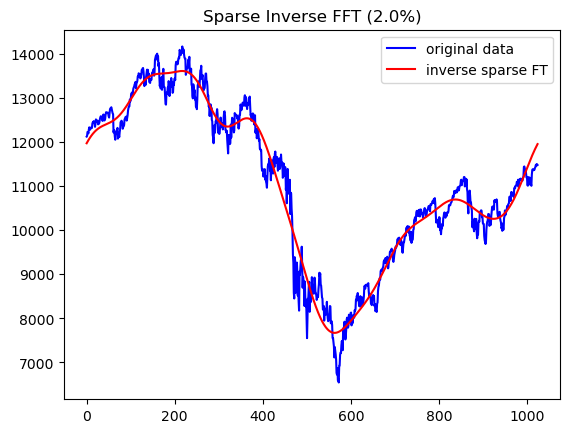

In [65]:
# exercise 7.4: Fourier filtering and smoothing

def sparse_inverse(filename, keep_fraction: float=0.1):
    y = np.loadtxt(filename)
    c = rfft(y)
    cutoff = int(len(c)*keep_fraction)
    c[cutoff:] = 0
    c = irfft(c)

    plt.plot(np.arange(len(y)), y, color='blue', label='original data')
    plt.plot(np.arange(len(c)), c, color='red', label='inverse sparse FT')
    plt.title(f'Sparse Inverse FFT ({keep_fraction*100}%)')
    plt.legend()
    plt.show()

sparse_inverse('dow.txt')
sparse_inverse('dow.txt', keep_fraction=0.02)

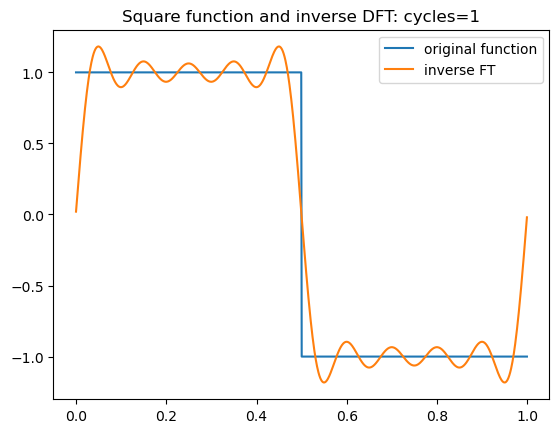

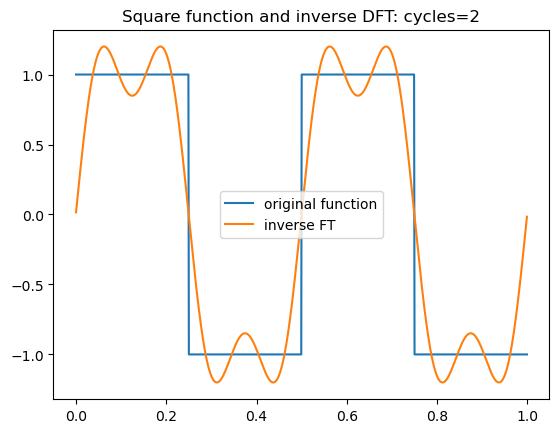

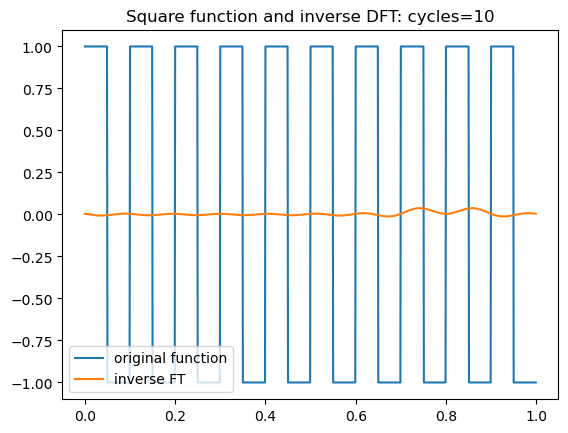

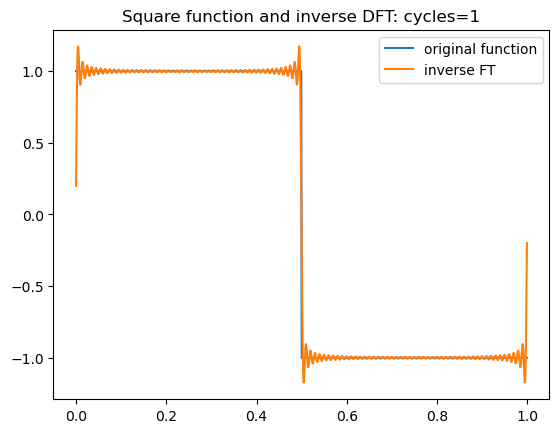

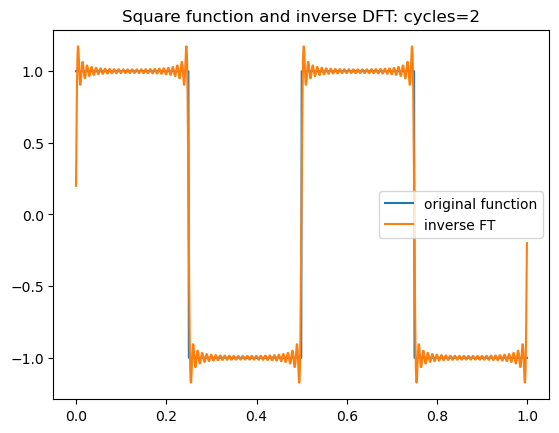

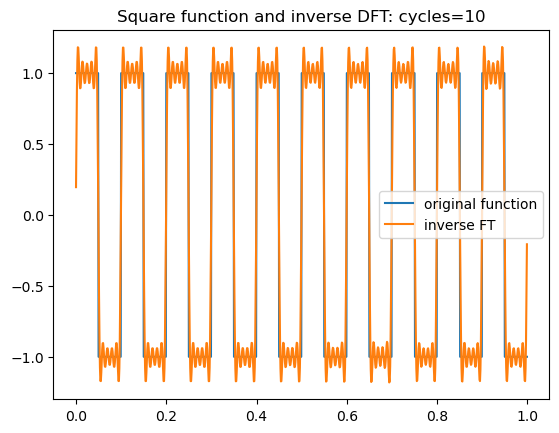

In [66]:
# exercise 7.5
from scipy.signal import square, sawtooth


def smooth_square(N: int=1000, cutoff: int=10, cycles: int=1):
    # construct the square wave 
    N = 1000   # number of sample points
    t = np.linspace(0, 1, N, endpoint=False)  # time points
    
    # part a: a single cycle of a square-wave with amplitude 
    square_wave = square((2*cycles)*np.pi*t)
    c = rfft(square_wave)
    c[cutoff:] = 0
    c = irfft(c)
    
    plt.plot(t, square_wave, label='original function')
    plt.plot(t, c, label='inverse FT')
    plt.title(f'Square function and inverse DFT: cycles={cycles}')
    plt.legend(loc='best')
    plt.show()

smooth_square()
smooth_square(cycles=2)
smooth_square(cycles=10)
smooth_square(cutoff=100)
smooth_square(cutoff=100, cycles=2)
smooth_square(cutoff=100, cycles=10)

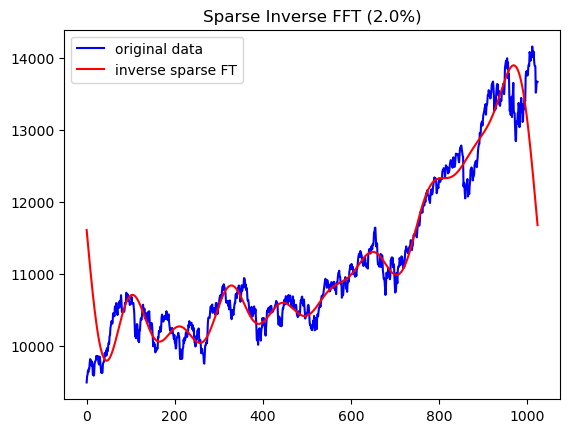

In [67]:
# exercise 7.6

sparse_inverse('dow2.txt', keep_fraction=0.02)

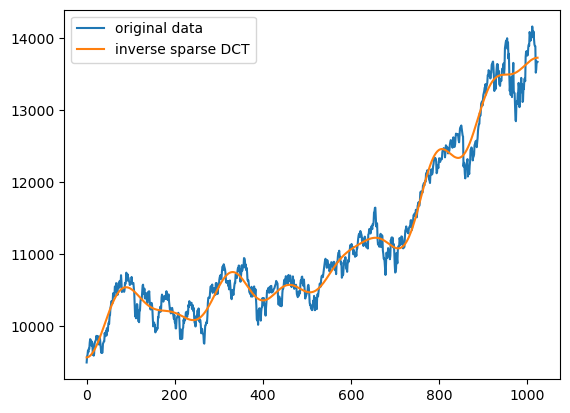

In [68]:
from dcst import dct, idct

y = np.loadtxt('dow2.txt')
c = dct(y)
c[int(len(c)*0.02):] = 0
c = idct(c)

plt.plot(np.arange(len(y)), y, label='original data')
plt.plot(np.arange(len(c)), c, label='inverse sparse DCT')
plt.legend()
plt.show()

## Euler's Method

In [16]:
def f(x,t):
    return -x**3 + np.sin(t)

a = 0
b = 10
N = 1000
h = (b - a) / N   # size of one step
t_vals = np.arange(a,b,h)  # evaluation points

def euler(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   # init condit
    for t in eval_points:
        x_vals.append(x)
        x += step*f(x,t)
    return x_vals

start = time.time()
f_x_vals = euler(f, t_vals, h, 0)
end = time.time()

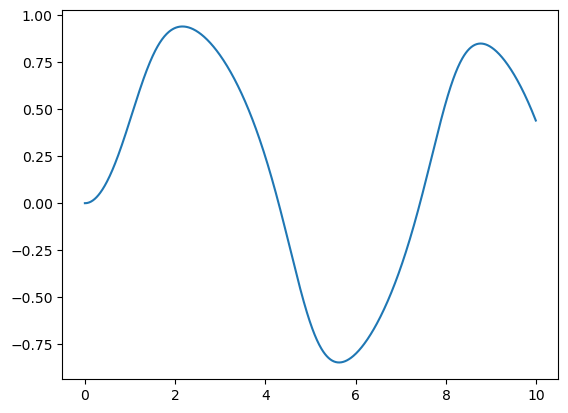

In [17]:
plt.plot(t_vals, f_x_vals)
plt.show()

## Second-Order-Runge-Kutta 

Time to run Euler's method: 1.60e-03s
Time to run second-order-RK: 3.33e-04s


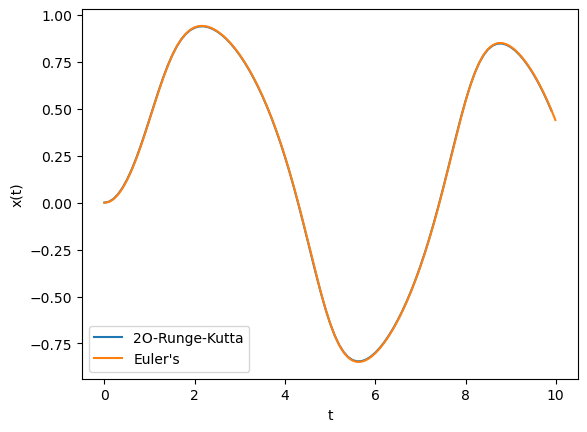

In [54]:
a1= 0
b1= 10
N1= 100
h1= (b1 - a1) / N1   # size of one step
t_vals1= np.arange(a1,b1,h1)  # evaluation points

def rk_2(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   
    for t in eval_points:
        x_vals.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x + (0.5*k1), t + (0.5*h))
        x += k2
    return x_vals

start1 = time.time()
fx_vals_rk = rk_2(f, t_vals1, h1, 0.)
end1 = time.time()

print(f'Time to run Euler\'s method: {end-start:.02e}s')
print(f'Time to run second-order-RK: {end1-start1:.02e}s')

plt.plot(t_vals1, fx_vals_rk, label='2O-Runge-Kutta')
plt.plot(t_vals, f_x_vals, label='Euler\'s')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Fourth-Order-RK

Time to run Euler's method: 1.60e-03s
Time to run second-order-RK: 3.33e-04s
Time to run fourth-order-RK: 9.56e-04s


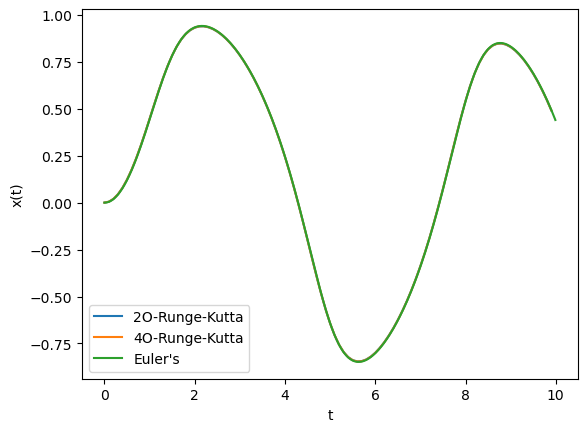

In [55]:
a2 = 0
b2 = 10
N2 = 100
h2 = (b2 - a2) / N2   # size of one step
t_vals2 = np.arange(a2, b2, h2)  # evaluation points

def rk_4(f, eval_points, step, init_condit):
    x_vals = []
    x = init_condit   
    for t in eval_points:
        x_vals.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
    return x_vals

start2 = time.time()
fx_vals_rk4 = rk_4(f, t_vals2, h2, 0.)
end2 = time.time()

print(f'Time to run Euler\'s method: {end-start:.02e}s')
print(f'Time to run second-order-RK: {end1-start1:.02e}s')
print(f'Time to run fourth-order-RK: {end2-start2:.02e}s')

plt.plot(t_vals1, fx_vals_rk, label='2O-Runge-Kutta')
plt.plot(t_vals2, fx_vals_rk4, label='4O-Runge-Kutta')
plt.plot(t_vals, f_x_vals, label='Euler\'s')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

### solving ODE over infinite range

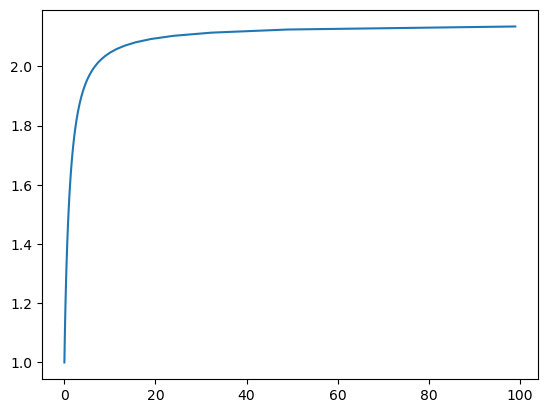

In [57]:
def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.
b = 1.
N = 100
h = (b - a)/N

upoints = np.arange(a, b, h)

def inode(g, init):
    tpoints = []
    xpoints = []
    x = init
    for u in upoints:
        tpoints.append(u/(1-u))
        xpoints.append(x)
        k1 = h*g(x,u)
        k2 = h*g(x+0.5*k1,u+0.5*h)
        k3 = h*g(x+0.5*k2,u+0.5*h)
        k4 = h*g(x+k3,u+h)
        x += (k1+2*k2+2*k3+k4)/6
    return xpoints, tpoints

xpoints, tpoints = inode(g, 1.)
plt.plot(tpoints, xpoints)
plt.show()

### simultaneous first-order ODEs

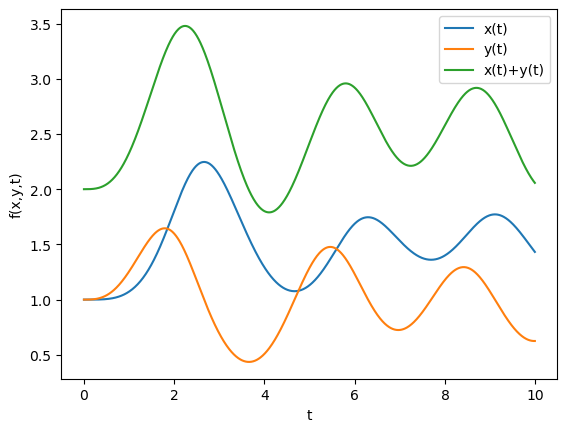

In [61]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tpoints,xpoints, label='x(t)')
plt.plot(tpoints,ypoints, label='y(t)')
plt.plot(tpoints, np.array(xpoints)+np.array(ypoints), label='x(t)+y(t)')
plt.xlabel("t")
plt.ylabel('f(x,y,t)')
plt.legend()
plt.show()

## Random Processes

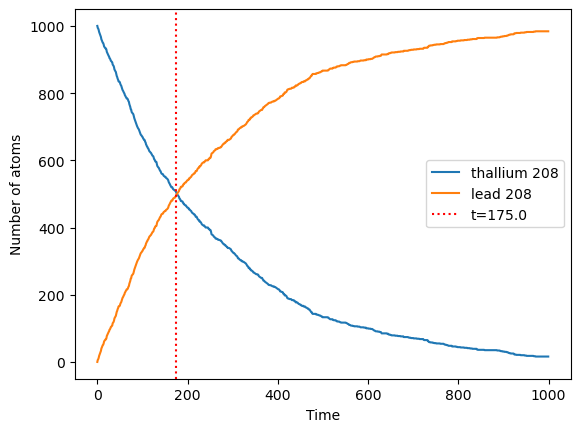

In [11]:
# example 10.1: decay of an isoptope

NTl = 1000
NPb = 0
tau = 3.053*60   # seconds
h = 1.   # time step in seconds
p = 1 - 2**(-h/tau)
tmax = 1000  # total time

tpoints = np.arange(0., tmax, h)
Tlpoints = []
Pbpoints = []

for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    decay = 0
    for i in range(NTl):
        if np.random.random() < p:
            decay += 1
    NTl -= decay
    NPb += decay
    if NTl == NPb:
        idx = t

plt.plot(tpoints,Tlpoints, label='thallium 208')
plt.plot(tpoints,Pbpoints, label='lead 208') 
plt.axvline(idx, ls='dotted', c='r', label=f't={idx}')
plt.xlabel("Time")
plt.ylabel("Number of atoms") 
plt.legend()
plt.show()

In [50]:
test_arr = np.array([[1,2,3,4,5,6,7],
                     [8,9,10,11,12,13, 14]])
test_arr

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14]])

In [51]:
test_arr.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])